# Módulo: MODELOS DE INTELIGENCIA ARTIFICIAL
## Ejercicio práctico 1.
## Sistema Basado en Reglas   
### Análisis de la calidad del aire

De forma similar a lo realizado en el notebook SBR_IRIS, construye un sistema de clasificación de la calidad del aire (AirQuality - AQI) en función de la cantidad de Ozono detectado en el mismo.   
Los valores del nivel de AQI se muestran en la siguiente tabla:  


| NIVEL AQI | RANGO-DESCRIPCIÓN|
|:---------:|:----------------:|
|   BUENO   |     0 - 50       |
| MODERADO  |    51 - 100      |
|CONTAMINADO|   101 - 150      |
|  INSANO   |   151 - 200      |
| PELIGROSO |       > 200      |

Se pide intentar establecer la clasificación según la tabla anterior en base a alguna de las características que conforman el dataset (Valor de O2, Valor de CO, Valor de NO2, Valor de PM2.5, Longitud y Latitud).   
Como los datos son numéricos y no faltan valores, no se requiere ningún procesamiento previo.   

Nuestro objetivo es predecir el AQI, por lo que esta tarea sería de clasificación o de regresión, pero en este caso vamos a tratar de establecer un SBR basado en una de las variables independientes citadas.

<u>Nota sobre la característica ***PM2.5***</u> :   
Este valor se corresponde con la concentración del material particulado (*PM - Particulate Matter*) de la fracción de tamaño PM2,5 (2.5 micrometros), el cúal se encuentra íntimamente asociado a problemas de salud dado que entre sus efectos aparecen impactos claros sobre las enfermedades cardiacas y pulmonares.   

### Importamos librerías necesarias

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# Ocultamos los warnings de las librerías
import warnings
warnings.filterwarnings("ignore")
# ------------------------------------------------

### Cargamos dataset *airquality.csv*

In [70]:
# Cargamos el dataset
data = pd.read_csv('datasets/airquality.csv')

### Análisis breve del dataset (EDA)

In [71]:
data.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [72]:
print("Numero de registros (filas):", data.shape[0])
print("Tipos de los datos")
data.dtypes

Numero de registros (filas): 16695
Tipos de los datos


AQI Value            int64
CO AQI Value         int64
Ozone AQI Value      int64
NO2 AQI Value        int64
PM2.5 AQI Value      int64
lat                float64
lng                float64
dtype: object

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        16695 non-null  int64  
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 913.1 KB


In [74]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


### Definicion y construccion del SBR
**Atributos**
    - self.rules: Es una lista que almacena las reglas del sistema. Cada regla es una tupla que contiene:
        - Una función de condición (condition): Evalúa si una regla es aplicable dado el valor de calidad del aire.
        - Una cadena con la categoria o etiqueta (label): Define la categoria del aire si la condición es verdadera.
    - self.data: Es un diccionario que actúa como la base de conocimiento del sistema.
Métodos:
- **load_data(file_path):** Carga los datos desde un archivo CSV.
- **add_rule(condition, label):** Agrega una nueva regla de clasificación con la correspondiente categoria o etiqueta.
- **classify(value):** Aplica las reglas a un valor individual y devuelve su categoría.
- **apply_rules(column, new_column):** Clasifica los valores de una columna del dataset cargado y escribe en una columna la categoria correspondiente.

Posteriormente se contruye el sbr y se cargan los datos de "airquality.csv"


In [75]:
class AirQualityRuleSystem:
    def __init__(self):
        self.rules = []
        self.data = None

    def load_data(self, file_path):
        #Carga el dataset de calidad del aire.
        self.data = pd.read_csv(file_path)
    
    def add_rule(self, condition, label):
        #Agrega una regla de clasificación.
        self.rules.append((condition, label))
    
    def classify(self, value):
        #Clasifica un valor de calidad del aire según las reglas definidas.
        for condition, label in self.rules:
            if condition(value):
                return label
        return "Desconocido"
    
    def apply_rules(self, column, new_column):
        """Aplica las reglas a una columna del dataset y almacena el resultado en una nueva columna."""
        if self.data is not None and column in self.data.columns:
            self.data[new_column] = self.data[column].apply(self.classify)
        else:
            print("Error: Datos no cargados o columna inválida")

sbr_AQI = AirQualityRuleSystem()
sbr_AQI.load_data('datasets/airquality.csv')

### Definición de reglas
Las reglas son funciones que reciben como parámetro el diccionario de calidad del aire  y devuelven una etiqueta.  
Cada regla representa una condición que debe cumplirse para que se categorice la calidad del aire. 

In [76]:
sbr_AQI.add_rule(lambda x: x > 200, "Peligroso")
sbr_AQI.add_rule(lambda x: x > 151, "Insano")
sbr_AQI.add_rule(lambda x: x > 101, "Contaminado")
sbr_AQI.add_rule(lambda x: x > 51, "Moderado")
sbr_AQI.add_rule(lambda x: x <= 51, "Bueno")

### Aplicación de reglas

In [77]:
sbr_AQI.apply_rules("AQI Value", "AirQualityLabel")

### Visualización gráfica

In [78]:
print(sbr_AQI.data.head())

   AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0         51             1               36              0               51   
1         41             1                5              1               41   
2         41             1                5              1               41   
3         66             1               39              2               66   
4         34             1               34              0               20   

       lat      lng AirQualityLabel  
0  44.7444  44.2031           Bueno  
1  -5.2900 -44.4900           Bueno  
2 -11.2958 -41.9869           Bueno  
3  37.1667  15.1833        Moderado  
4  53.0167  20.8833           Bueno  


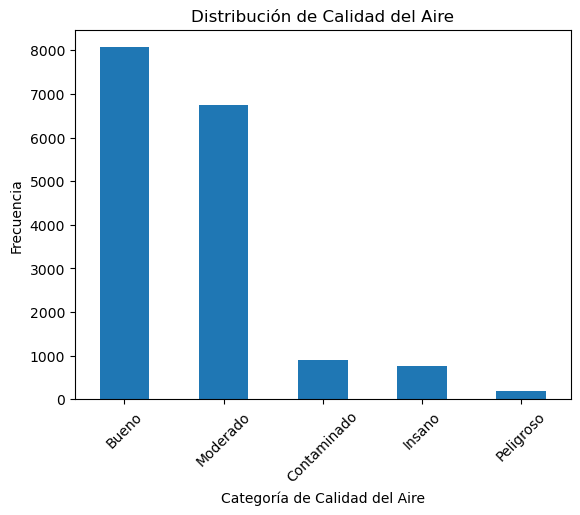

In [ ]:
def plot_distribution(data, column):
    """Grafica la distribución de etiquetas de calidad del aire."""
    if column in data.columns:
        data[column].value_counts().plot(kind='bar')
        plt.xlabel("Categoría de Calidad del Aire")
        plt.ylabel("Frecuencia")
        plt.title("Distribución de Calidad del Aire")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("Error: Columna inválida")

plot_distribution(sbr_AQI.data, "AirQualityLabel")

